## Introduction

In this project, we will take a look at vaccination, a key public health measure used to fight infectious diseases. Vaccines provide immunization for individuals, and enough immunization in a community can further reduce the spread of diseases through "herd immunity."

Beginning in spring 2009, a pandemic caused by the H1N1 influenza virus, colloquially named "swine flu," swept across the world. Researchers estimate that in the first year, it was responsible for between 151,000 to 575,000 deaths globally.

A vaccine for the H1N1 flu virus became publicly available in October 2009. In late 2009 and early 2010, the United States conducted the National 2009 H1N1 Flu Survey. This phone survey asked respondents whether they had received the H1N1 and seasonal flu vaccines, in conjunction with questions about themselves. These additional questions covered their social, economic, and demographic background, opinions on risks of illness and vaccine effectiveness, and behaviors towards mitigating transmission. A better understanding of how these characteristics are associated with personal vaccination patterns can provide guidance for future public health efforts.

In [173]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import interpolate
from sklearn.decomposition import PCA, FactorAnalysis
from sklearn.covariance import ShrunkCovariance, LedoitWolf
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from skmultilearn.problem_transform import BinaryRelevance, ClassifierChain
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix,roc_curve,classification_report
from sklearn.preprocessing import LabelBinarizer
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
import scipy.sparse
import scipy as sk
import matplotlib.patches as mpatches
from pandas.plotting import scatter_matrix
from sklearn import model_selection
from sklearn.utils.estimator_checks import check_estimator
from sklearn.preprocessing import label_binarize
from sklearn import metrics
from sklearn import svm, datasets
from sklearn.externals import joblib
import warnings
import statistics
warnings.filterwarnings('ignore')


In [107]:
training_set_features = pd.read_csv('training_set_features.csv')
test_set_features = pd.read_csv('test_set_features.csv')
training_set_labels = pd.read_csv('training_set_labels.csv')
df = training_set_features.merge(training_set_labels,on='respondent_id',how='left')

In [108]:
df.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


In [109]:
df.describe()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,h1n1_vaccine,seasonal_vaccine
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,...,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000,26707.000000,26707.000000
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,...,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583,0.212454,0.465608
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,...,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173,0.409052,0.498825
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,...,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,...,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,...,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000,0.000000,1.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,1.000000,1.000000


In [110]:
df.isna().sum()

respondent_id                      0
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
m

In [111]:
df = df.dropna(subset=['h1n1_concern','h1n1_knowledge','behavioral_antiviral_meds','behavioral_avoidance',
                      'behavioral_face_mask','behavioral_wash_hands', 'behavioral_large_gatherings',
                       'behavioral_outside_home', 'behavioral_touch_face','household_adults','household_children',
                      'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc',
                       'opinion_seas_vacc_effective', 'opinion_seas_risk', 'opinion_seas_sick_from_vacc',
                       'chronic_med_condition', 'child_under_6_months', 'health_worker'],axis=0)
test_set_features = test_set_features.dropna(subset=['h1n1_concern','h1n1_knowledge','behavioral_antiviral_meds','behavioral_avoidance',
                      'behavioral_face_mask','behavioral_wash_hands', 'behavioral_large_gatherings',
                       'behavioral_outside_home', 'behavioral_touch_face','household_adults','household_children',
                      'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc',
                       'opinion_seas_vacc_effective', 'opinion_seas_risk', 'opinion_seas_sick_from_vacc',
                       'chronic_med_condition', 'child_under_6_months', 'health_worker'],axis=0)

df.isna().sum()

respondent_id                      0
h1n1_concern                       0
h1n1_knowledge                     0
behavioral_antiviral_meds          0
behavioral_avoidance               0
behavioral_face_mask               0
behavioral_wash_hands              0
behavioral_large_gatherings        0
behavioral_outside_home            0
behavioral_touch_face              0
doctor_recc_h1n1                1827
doctor_recc_seasonal            1827
chronic_med_condition              0
child_under_6_months               0
health_worker                      0
health_insurance               10981
opinion_h1n1_vacc_effective        0
opinion_h1n1_risk                  0
opinion_h1n1_sick_from_vacc        0
opinion_seas_vacc_effective        0
opinion_seas_risk                  0
opinion_seas_sick_from_vacc        0
age_group                          0
education                        523
race                               0
sex                                0
income_poverty                  3284
m

In [112]:
for column in df.columns:
    df[column].fillna(df[column].mode()[0], inplace=True)
for column in test_set_features.columns:
    test_set_features[column].fillna(test_set_features[column].mode()[0], inplace=True)
print(df.isna().sum())
print(test_set_features.isna().sum())

respondent_id                  0
h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_re

In [113]:
df = df.astype({"education":'category',"marital_status":'category',
                                    "rent_or_own":'category',"employment_status":'category',"census_msa":'category',
                         "race":'category',"sex":'category',"income_poverty":'category',"age_group":'category'})
test_set_features = test_set_features.astype({"education":'category',"marital_status":'category',
                                    "rent_or_own":'category',"employment_status":'category',"census_msa":'category',
                         "race":'category',"sex":'category',"income_poverty":'category',"age_group":'category'})

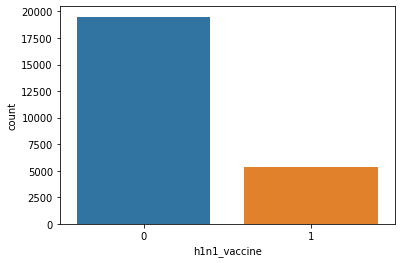

In [114]:
sns.countplot(x='h1n1_vaccine',data=df)
plt.show()

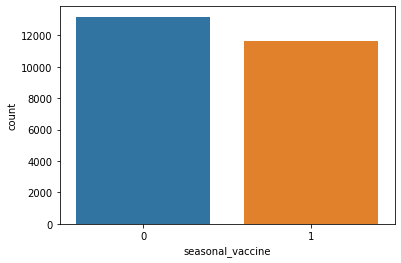

In [115]:
sns.countplot(x='seasonal_vaccine',data=df)
plt.show()

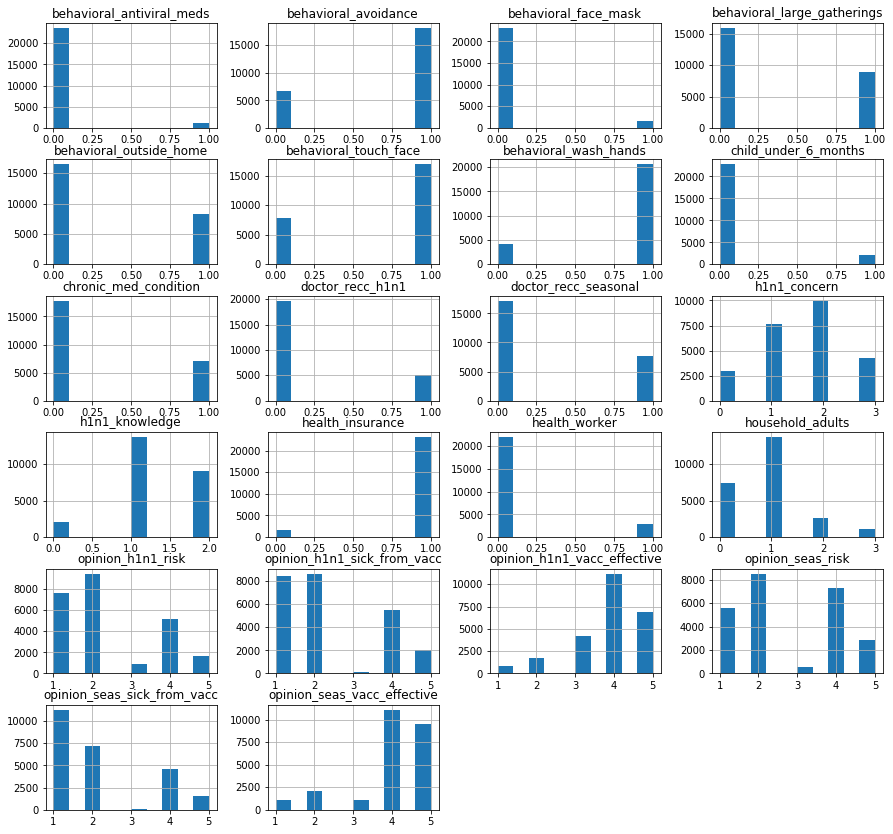

In [116]:
df.iloc[:,1:33].hist( figsize=(15, 22), layout=(9, 4));

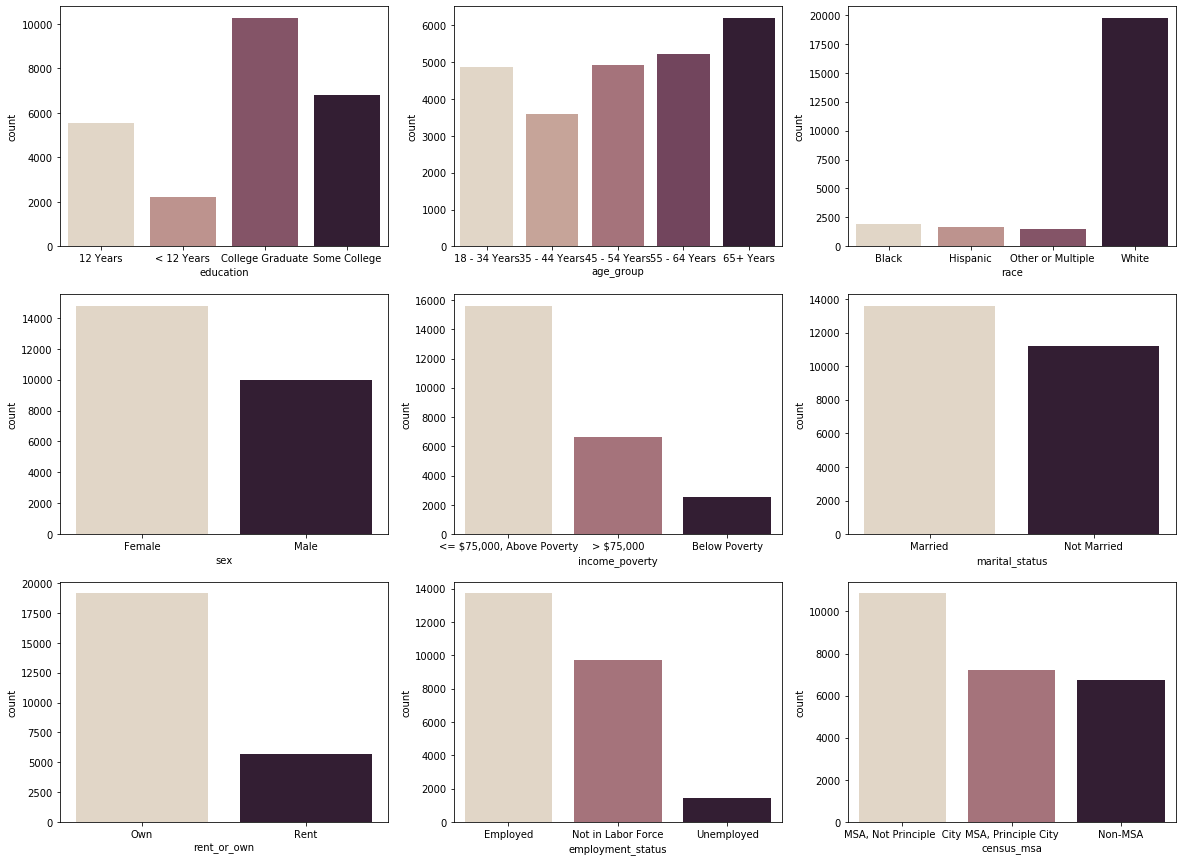

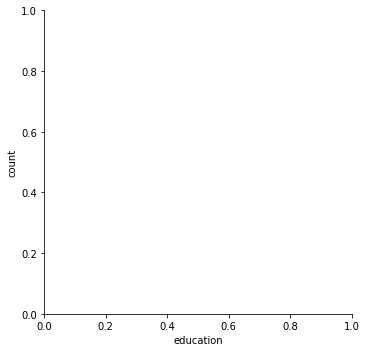

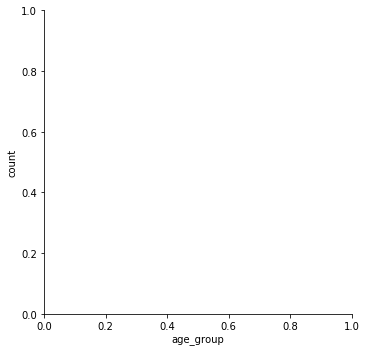

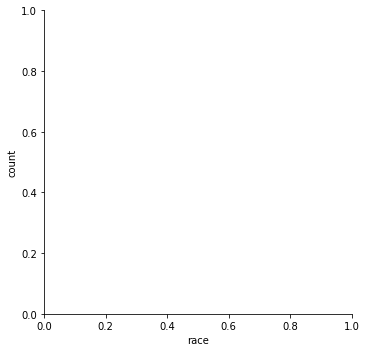

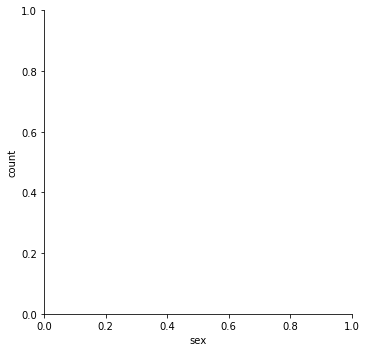

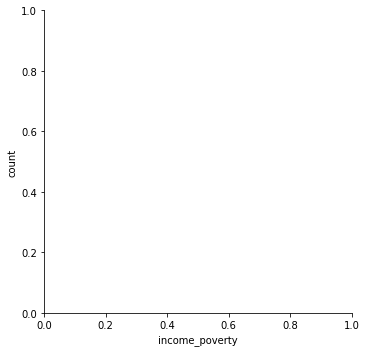

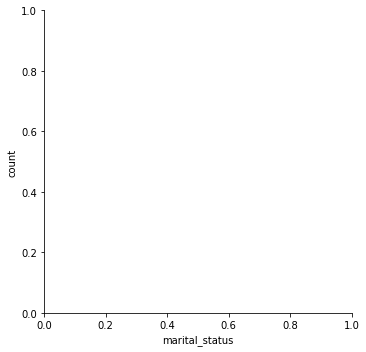

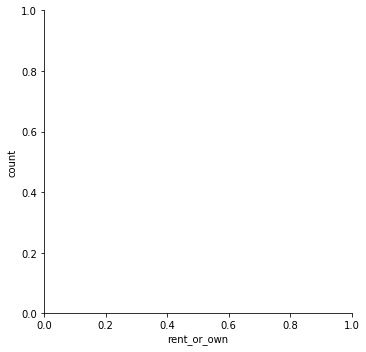

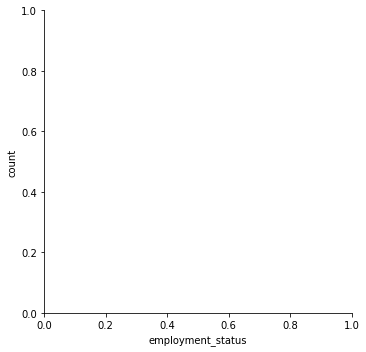

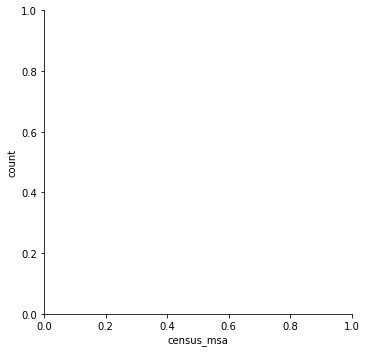

In [117]:
fig = plt.figure(figsize = (20,15))

ax1 = fig.add_subplot(3,3,1)
sns.catplot(x="education", kind="count", palette="ch:.25", data=df,ax=ax1);

ax2 = fig.add_subplot(3,3,2)
sns.catplot(x="age_group", kind="count", palette="ch:.25", data=df,ax=ax2);

ax3 = fig.add_subplot(3,3,3)
sns.catplot(x="race", kind="count", palette="ch:.25", data=df,ax=ax3);

ax4 = fig.add_subplot(3,3,4)
sns.catplot(x="sex", kind="count", palette="ch:.25", data=df,ax=ax4);

ax5 = fig.add_subplot(3,3,5)
sns.catplot(x="income_poverty", kind="count", palette="ch:.25", data=df,ax=ax5);

ax6 = fig.add_subplot(3,3,6)
sns.catplot(x="marital_status", kind="count", palette="ch:.25", data=df,ax=ax6);

ax7 = fig.add_subplot(3,3,7)
sns.catplot(x="rent_or_own", kind="count", palette="ch:.25", data=df,ax=ax7);

ax8 = fig.add_subplot(3,3,8)
sns.catplot(x="employment_status", kind="count", palette="ch:.25", data=df,ax=ax8);

ax9 = fig.add_subplot(3,3,9)
sns.catplot(x="census_msa", kind="count", palette="ch:.25", data=df,ax=ax9);



In [118]:
df = df.drop(['employment_industry','employment_occupation','hhs_geo_region','employment_industry',
             'employment_occupation'],axis=1)
test_set_features = test_set_features.drop(['employment_industry','employment_occupation','hhs_geo_region','employment_industry',
             'employment_occupation'],axis=1)

In [119]:
df["education_cat"] = df["education"].cat.codes
df["marital_status_cat"] = df["marital_status"].cat.codes
df["rent_or_own_cat"] = df["rent_or_own"].cat.codes
df["employment_status_cat"] = df["employment_status"].cat.codes
df["census_msa_cat"] = df["census_msa"].cat.codes
df["race_cat"] = df["race"].cat.codes
df["sex_cat"] = df["sex"].cat.codes
df["income_poverty_cat"] = df["income_poverty"].cat.codes
df["age_group_cat"] = df["age_group"].cat.codes
df.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,seasonal_vaccine,education_cat,marital_status_cat,rent_or_own_cat,employment_status_cat,census_msa_cat,race_cat,sex_cat,income_poverty_cat,age_group_cat
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0,1,1,0,1,2,3,0,2,3
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,1,0,1,1,0,0,3,1,2,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,2,1,0,0,0,3,1,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1,0,1,1,1,1,3,0,2,4
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0,3,0,0,0,0,3,0,0,2


In [120]:
test_set_features["education_cat"] = test_set_features["education"].cat.codes
test_set_features["marital_status_cat"] = test_set_features["marital_status"].cat.codes
test_set_features["rent_or_own_cat"] = test_set_features["rent_or_own"].cat.codes
test_set_features["employment_status_cat"] = test_set_features["employment_status"].cat.codes
test_set_features["census_msa_cat"] = test_set_features["census_msa"].cat.codes
test_set_features["race_cat"] = test_set_features["race"].cat.codes
test_set_features["sex_cat"] = test_set_features["sex"].cat.codes
test_set_features["income_poverty_cat"] = test_set_features["income_poverty"].cat.codes
test_set_features["age_group_cat"] = test_set_features["age_group"].cat.codes
test_set_features.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,household_children,education_cat,marital_status_cat,rent_or_own_cat,employment_status_cat,census_msa_cat,race_cat,sex_cat,income_poverty_cat,age_group_cat
0,26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,2,1,1,0,0,1,0,1,1
1,26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,1,1,0,2,3,1,2,0
2,26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,0.0,2,0,0,0,2,3,1,1,3
3,26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,1,0,3,0,0,4
4,26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,1.0,0,1,0,0,2,0,0,0,1


In [121]:
df = df.drop(["education","marital_status","rent_or_own","employment_status","census_msa","race","sex",
                      "income_poverty","age_group"],axis=1)
test_set_features = test_set_features.drop(["education","marital_status","rent_or_own","employment_status","census_msa","race","sex",
                      "income_poverty","age_group"],axis=1)


In [122]:
df.drop(df[df.rent_or_own_cat < 0].index, inplace=True)
df.drop(df[df.employment_status_cat < 0].index, inplace=True)
df.drop(df[df.marital_status_cat < 0].index, inplace=True)
df.drop(df[df.education_cat < 0].index, inplace=True)

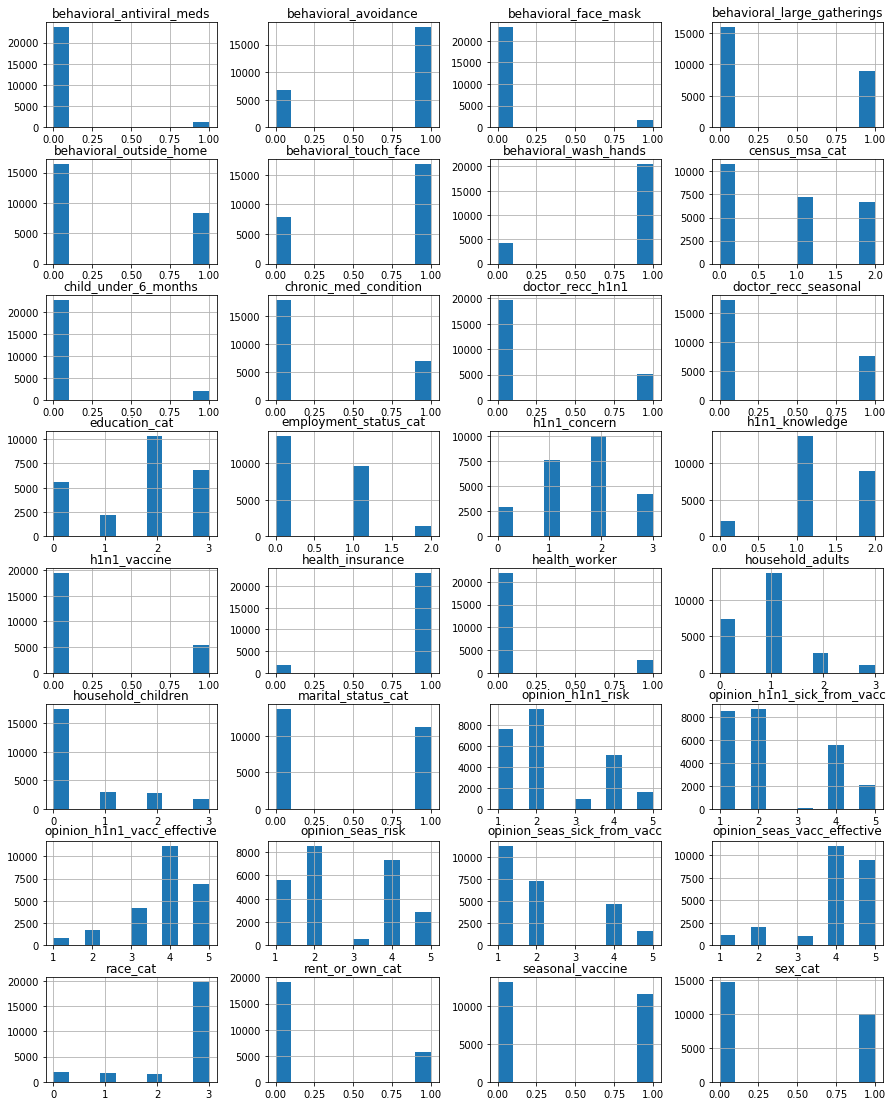

In [123]:
df.iloc[:,1:33].hist( figsize=(15, 22), layout=(9, 4));

In [124]:
test_set_features.drop(test_set_features[test_set_features.rent_or_own_cat < 0].index, inplace=True)
test_set_features.drop(test_set_features[test_set_features.employment_status_cat < 0].index, inplace=True)
test_set_features.drop(test_set_features[test_set_features.marital_status_cat < 0].index, inplace=True)
test_set_features.drop(test_set_features[test_set_features.education_cat < 0].index, inplace=True)

In [139]:
X = df.loc[:, (df.columns != 'h1n1_vaccine') & (df.columns != 'seasonal_vaccine')]
y_h1n1 = df.loc[:,['h1n1_vaccine']]
y_seasonal = df.loc[:,['seasonal_vaccine']]

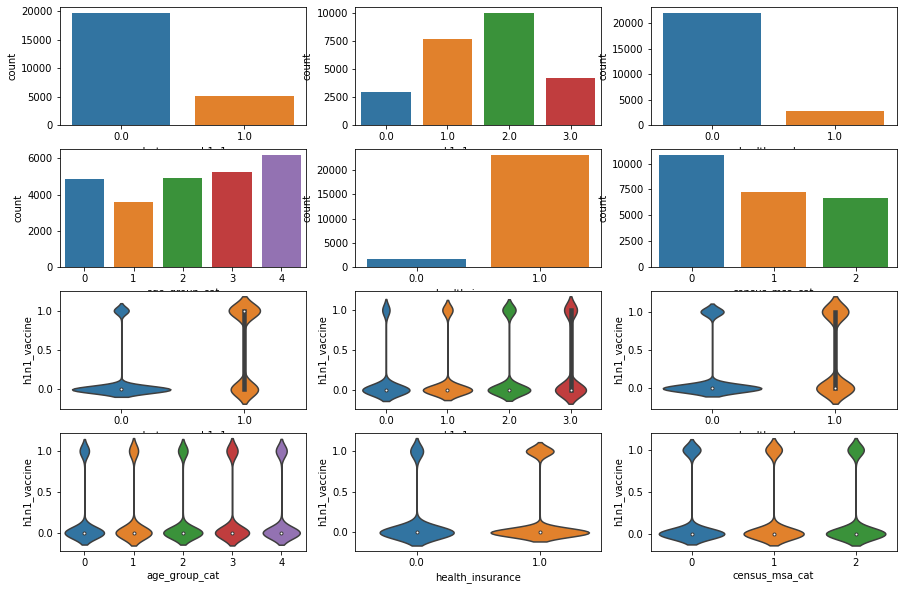

In [140]:
fig = plt.figure(figsize = (15,10))

ax1 = fig.add_subplot(4,3,1)
sns.countplot(data = df, x = 'doctor_recc_h1n1', ax=ax1)

ax2 = fig.add_subplot(4,3,2)
sns.countplot(data = df, x = 'h1n1_concern', ax=ax2)

ax3 = fig.add_subplot(4,3,3)
sns.countplot(data = df, x = 'health_worker', ax=ax3)

ax4 = fig.add_subplot(4,3,4)
sns.countplot(data = df, x = 'age_group_cat', ax=ax4)

ax5 = fig.add_subplot(4,3,5)
sns.countplot(data = df, x = 'health_insurance', ax=ax5)

ax6 = fig.add_subplot(4,3,6)
sns.countplot(data = df, x = 'census_msa_cat', ax=ax6)


ax7 = fig.add_subplot(4,3,7)
#sns.boxplot(data = df, x = 'doctor_recc_h1n1', y = 'h1n1_vaccine' , ax=ax7)
sns.violinplot(data = df, x = 'doctor_recc_h1n1', y = 'h1n1_vaccine', ax = ax7)

ax8 = fig.add_subplot(4,3,8)
#sns.boxplot(data = df, x = 'h1n1_concern', y = 'h1n1_vaccine', ax=ax8)
sns.violinplot(data = df, x = 'h1n1_concern', y = 'h1n1_vaccine', ax = ax8)

ax9 = fig.add_subplot(4,3,9)
#sns.boxplot(data = df, x = 'health_worker', y = 'h1n1_vaccine', ax=ax9)
sns.violinplot(data = df, x = 'health_worker', y = 'h1n1_vaccine', ax = ax9)

ax10 = fig.add_subplot(4,3,10)
#sns.boxplot(data = df, x = 'doctor_recc_h1n1', y = 'h1n1_vaccine' , ax=ax10)
sns.violinplot(data = df, x = 'age_group_cat', y = 'h1n1_vaccine', ax = ax10)

ax11 = fig.add_subplot(4,3,11)
#sns.boxplot(data = df, x = 'h1n1_concern', y = 'h1n1_vaccine', ax=ax11)
sns.violinplot(data = df, x = 'health_insurance', y = 'h1n1_vaccine', ax = ax11)

ax12 = fig.add_subplot(4,3,12)
#sns.boxplot(data = df, x = 'health_worker', y = 'h1n1_vaccine', ax=ax12)
sns.violinplot(data = df, x = 'census_msa_cat', y = 'h1n1_vaccine', ax = ax12)


In [147]:
X_train_h1n1, X_test_h1n1, y_train_h1n1, y_test_h1n1 = train_test_split(X,y_h1n1,test_size=0.2)
X_train_seasonal, X_test_seasonal, y_train_seasonal, y_test_seasonal = train_test_split(X,y_seasonal,test_size=0.2)

In [198]:
roc_scores = []
result = pd.DataFrame()

In [204]:
def isUnder(a, b, c):
    #x_coordinate [0][0]\
    #y_coordinate [1][0]\
    result = ((a[0][0] - b[0][0])*(c[1][0] - b[1][0]) - (c[0][0] - b[0][0])*(a[1][0] - b[1][0]))
    if (result > 0):
        return True
    else:
        return False


def LR_ROC(X_train, X_test, y_train, y_test):
   
    lr = LogisticRegression(class_weight='balanced')
    lr.fit(X_train,y_train)
    #The score function of sklearn can quickly assess the model performance
    #due to class imbalance , we nned to evaluate the model performance
    #on every class. Which means to find when we classify people from the first team wrong


    #feature selection RFE is based on the idea to repeatedly construct a model and choose either the best
    #or worst performing feature, setting the feature aside and then repeating the process with the rest of the 
    #features. This process is applied until all features in the dataset are exhausted. The goal of RFE is to select
    # features by recursively considering smaller and smaller sets of features
    rfe = RFE(lr,30)
    rfe = rfe.fit(X_train,y_train)
    #print rfe.support_

    #An index that selects the retained features from a feature vector. If indices is False, this is a boolean array of shape 
    #[# input features], in which an element is True iff its corresponding feature is selected for retention

    #print rfe.ranking_

    #so we have to take all the features

    #model fitting

    #predicting the test set results and calculating the accuracy
    y_pred  = lr.predict(X_test)
    print ('Accuracy of logistic regression classifier on the test set: ', lr.score(X_test,y_test))

    #cross validation
    kfold = model_selection.KFold(n_splits=10,shuffle=True,random_state=7)
    modelCV = LogisticRegression()
    scoring = 'accuracy'
    results = model_selection.cross_val_score(modelCV, X_train,y_train,cv=kfold,scoring=scoring)
    print ('10-fold cross validation average accuracy: ', results.mean())

    #confusion matrix
    confusionMatrix = confusion_matrix(y_test,y_pred)
    print ('Confusion matrix: ')
    print (confusionMatrix)
    print ('We had ',confusionMatrix[0][0] + confusionMatrix[1][1], 'correct predictions')
    print ('And ',confusionMatrix[1][0] + confusionMatrix[0][1],'incorrect prediction')
    print ('')

    #The precision is intuitively the ability of the classifier to not label a sample as positive if it is negative.
    #The recall is intuitively the ability of the classifier to find all the positive samples.
    #The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.
    #The support is the number of occurrences of each class in y_test.

    #classification report
    print(classification_report(y_test,y_pred))

    #roc curve
    logit_roc_auc = roc_auc_score(y_test, lr.predict(X_test))
    roc_scores.append(logit_roc_auc)
    fpr , tpr , thresholds = roc_curve(y_test,lr.predict_proba(X_test)[:,1])

    #AUC is a measure of the overall performance of a diagnostic test and is 
    #interpreted as the average value of sensitivity for all possible values of specificity
    plt.figure(3)
    plt.plot(fpr,tpr,label='Logistic Regression (area = %0.2f)' %logit_roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc='lower right')
    plt.show()
    
    result_probs =lr.predict_proba(X_test)[:,1]
    return result_probs
    



Accuracy of logistic regression classifier on the test set:  0.7812940939326749
10-fold cross validation average accuracy:  0.8061173011294386
Confusion matrix: 
[[3077  784]
 [ 301  799]]
We had  3876 correct predictions
And  1085 incorrect prediction

              precision    recall  f1-score   support

           0       0.91      0.80      0.85      3861
           1       0.50      0.73      0.60      1100

    accuracy                           0.78      4961
   macro avg       0.71      0.76      0.72      4961
weighted avg       0.82      0.78      0.79      4961



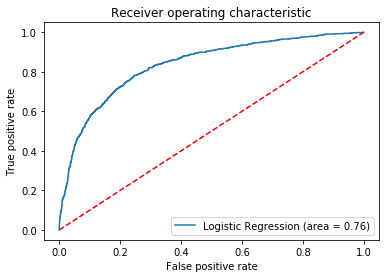

In [205]:
 h1n1_probs = LR_ROC(X_train_h1n1, X_test_h1n1, y_train_h1n1, y_test_h1n1)

Accuracy of logistic regression classifier on the test set:  0.7810925216690183
10-fold cross validation average accuracy:  0.7638332859348338
Confusion matrix: 
[[2059  558]
 [ 528 1816]]
We had  3875 correct predictions
And  1086 incorrect prediction

              precision    recall  f1-score   support

           0       0.80      0.79      0.79      2617
           1       0.76      0.77      0.77      2344

    accuracy                           0.78      4961
   macro avg       0.78      0.78      0.78      4961
weighted avg       0.78      0.78      0.78      4961



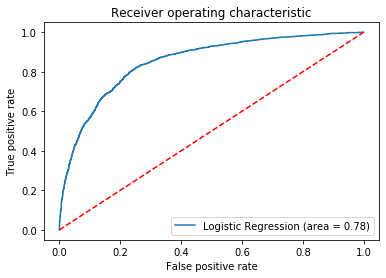

In [206]:
seasonal_probs = LR_ROC(X_train_seasonal, X_test_seasonal, y_train_seasonal, y_test_seasonal)

In [207]:
mean_roc_scores = statistics.mean(roc_scores)
mean_roc_scores

0.7712075537275007

In [208]:
result['h1n1_vaccine'] =  h1n1_probs
result['seasonal_vaccine'] = seasonal_probs
result.head()

,h1n1_vaccine,seasonal_vaccine
0,0.221729,0.64888
1,0.221729,0.64888
2,0.221729,0.64888
3,0.221729,0.64888
4,0.221729,0.64888
